In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train = pd.read_csv('./train.csv')
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.drop(columns=['Name','PassengerId'],inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
train.isnull().any()

,0
Survived,False
Pclass,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False
Cabin,True
Embarked,True


In [ ]:
train.isnull().any().sum()


3

In [ ]:
train.select_dtypes(include='object').columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
train['Sex'].isnull().sum()

0

In [ ]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train['Cabin'].isnull().sum()


687

In [ ]:
train['Cabin'].nunique()


147

In [ ]:
train.drop(columns='Cabin',inplace=True)

In [ ]:
train.select_dtypes(include='object').columns

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [ ]:
train['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train['Embarked'].isnull().sum()


2

In [ ]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

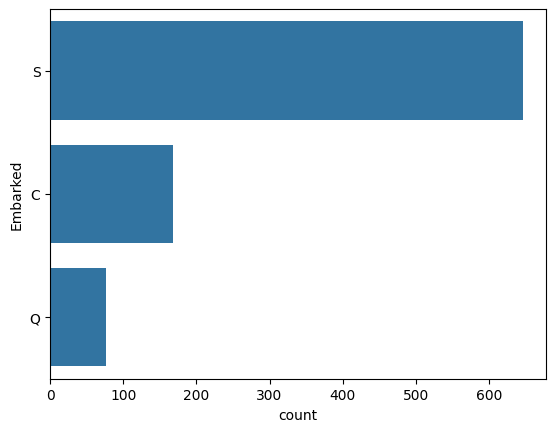

In [ ]:
sns.countplot(train['Embarked'], label='Count')
plt.show()

In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

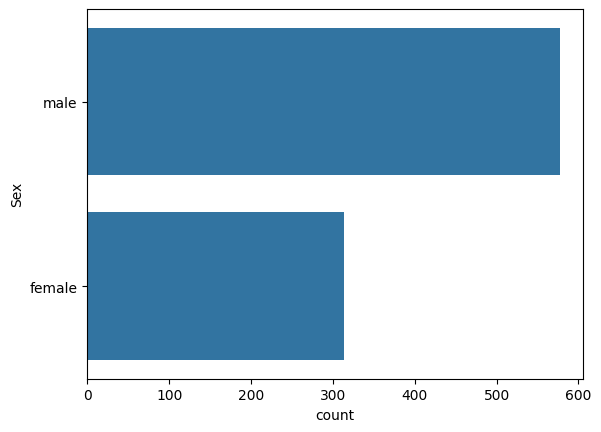

In [ ]:
sns.countplot(train['Sex'], label='Count')
plt.show()

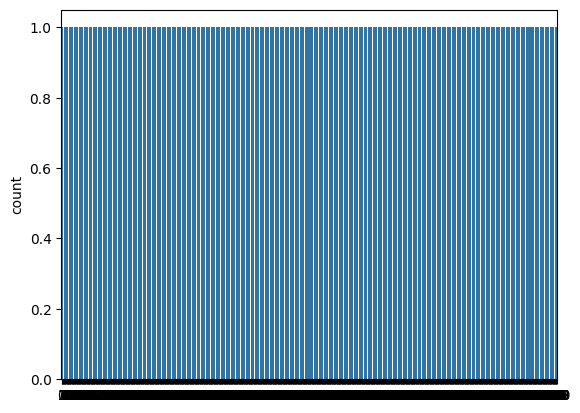

In [ ]:
sns.countplot(train['Survived'], label='Count')
plt.show()

In [ ]:
train['Age'].isnull().any()

True

In [ ]:
train['Age'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


177

In [ ]:
train['Age'].fillna(round(train['Age'].mean(),2), inplace=True)


In [ ]:
train['Age'].isnull().any()

False

In [ ]:
train['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,29.7
889,26.0


In [ ]:
train.isnull().any().sum()


0

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,29.7,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [ ]:
# Function to extract the prefix (if it exists) and the numeric part
def extract_ticket_info(ticket):
    parts = ticket.split()  # Split the ticket by spaces
    if len(parts) > 1:
        return parts[0], parts[1]  # Return prefix and numeric part
    else:
        return 'None', parts[0]    # No prefix, return 'None' and the number

In [ ]:
# Apply the function to the 'Ticket' column
train['TicketPrefix'], train['TicketNumber'] = zip(*train['Ticket'].apply(extract_ticket_info))

# Convert the numeric part to float for consistency
train['TicketNumber'] = pd.to_numeric(train['TicketNumber'], errors='coerce')

print(train)

     Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female  29.7      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Embarked TicketPrefix  TicketNumber

In [ ]:
train = train.drop('Ticket', axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketNumber
0,0,3,male,22.0,1,0,7.2500,S,A/5,21171.0
1,1,1,female,38.0,1,0,71.2833,C,PC,17599.0
2,1,3,female,26.0,0,0,7.9250,S,STON/O2.,3101282.0
3,1,1,female,35.0,1,0,53.1000,S,None,113803.0
4,0,3,male,35.0,0,0,8.0500,S,None,373450.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,None,211536.0
887,1,1,female,19.0,0,0,30.0000,S,None,112053.0
888,0,3,female,29.7,1,2,23.4500,S,W./C.,6607.0
889,1,1,male,26.0,0,0,30.0000,C,None,111369.0


In [ ]:
train['TicketNumber'].isnull().sum()

5

In [ ]:
train.dropna(subset=['TicketNumber'], inplace=True)


In [ ]:
train['TicketNumber']

,TicketNumber
0,21171.0
1,17599.0
2,3101282.0
3,113803.0
4,373450.0
...,...
886,211536.0
887,112053.0
888,6607.0
889,111369.0


In [ ]:
train['TicketNumber'].isnull().sum()

0

In [ ]:
train['TicketPrefix'].isnull().any()

False

In [ ]:
# Replace 'None' or NaN with 'Unknown'
# train['TicketPrefix'].replace('None', 'Unknown', inplace=True)

In [ ]:
train['TicketPrefix'].isnull().sum()

0

In [ ]:
y= train.iloc[:,0]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x = train.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketNumber
0,3,male,22.0,1,0,7.2500,S,A/5,21171.0
1,1,female,38.0,1,0,71.2833,C,PC,17599.0
2,3,female,26.0,0,0,7.9250,S,STON/O2.,3101282.0
3,1,female,35.0,1,0,53.1000,S,None,113803.0
4,3,male,35.0,0,0,8.0500,S,None,373450.0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,None,211536.0
887,1,female,19.0,0,0,30.0000,S,None,112053.0
888,3,female,29.7,1,2,23.4500,S,W./C.,6607.0
889,1,male,26.0,0,0,30.0000,C,None,111369.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        886 non-null    int64  
 1   Sex           886 non-null    object 
 2   Age           886 non-null    float64
 3   SibSp         886 non-null    int64  
 4   Parch         886 non-null    int64  
 5   Fare          886 non-null    float64
 6   Embarked      886 non-null    object 
 7   TicketPrefix  886 non-null    object 
 8   TicketNumber  886 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 69.2+ KB


In [ ]:
x.select_dtypes(include='object').columns

Index(['Sex', 'Embarked', 'TicketPrefix'], dtype='object')

In [ ]:
x.isnull().any()

,0
Pclass,False
Sex,False
Age,False
SibSp,False
Parch,False
Fare,False
Embarked,False
TicketPrefix,False
TicketNumber,False


In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketNumber
0,3,male,22.0,1,0,7.2500,S,A/5,21171.0
1,1,female,38.0,1,0,71.2833,C,PC,17599.0
2,3,female,26.0,0,0,7.9250,S,STON/O2.,3101282.0
3,1,female,35.0,1,0,53.1000,S,None,113803.0
4,3,male,35.0,0,0,8.0500,S,None,373450.0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,None,211536.0
887,1,female,19.0,0,0,30.0000,S,None,112053.0
888,3,female,29.7,1,2,23.4500,S,W./C.,6607.0
889,1,male,26.0,0,0,30.0000,C,None,111369.0


In [ ]:
x.values

array([[3, 'male', 22.0, ..., 'S', 'A/5', 21171.0],
       [1, 'female', 38.0, ..., 'C', 'PC', 17599.0],
       [3, 'female', 26.0, ..., 'S', 'STON/O2.', 3101282.0],
       ...,
       [3, 'female', 29.7, ..., 'S', 'W./C.', 6607.0],
       [1, 'male', 26.0, ..., 'C', 'None', 111369.0],
       [3, 'male', 32.0, ..., 'Q', 'None', 370376.0]], dtype=object)

In [ ]:
x.iloc[:,1]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [ ]:
x.iloc[:,1].unique()

array(['male', 'female'], dtype=object)

In [ ]:
x.iloc[:,6].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
x.iloc[:,6]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
x.iloc[:,7]

,TicketPrefix
0,A/5
1,PC
2,STON/O2.
3,None
4,None
...,...
886,None
887,None
888,W./C.
889,None


In [ ]:
x.iloc[:,7].unique()

array(['A/5', 'PC', 'STON/O2.', 'None', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [ ]:
x.iloc[:,7].nunique()

43

In [ ]:
def standardize_prefix(prefix):
    """
    Standardize the ticket prefix by:
    - Stripping leading and trailing spaces
    - Converting to uppercase
    - Removing all periods
    """
    if isinstance(prefix, str):
        return prefix.strip().upper().replace('.', '')
    return prefix



In [ ]:
x['TicketPrefix'] = x['TicketPrefix'].apply(standardize_prefix)

In [ ]:
x.iloc[:,7].unique()

array(['A/5', 'PC', 'STON/O2', 'NONE', 'PP', 'CA', 'SC/PARIS', 'SC/A4',
       'A/4', 'SP', 'SOC', 'SO/C', 'W/C', 'SOTON/OQ', 'WEP', 'STON/O',
       'A4', 'C', 'SOP', 'A5', 'FA', 'FCC', 'SW/PP', 'SCO/W', 'P/PP',
       'SC', 'SC/AH', 'A/S', 'WE/P', 'SO/PP', 'FC', 'SOTON/O2',
       'CA/SOTON'], dtype=object)

In [ ]:
x.iloc[:,7].nunique()

33

In [ ]:
# x_copy = x.drop(columns=['Embarked','Sex'])

In [ ]:
# x_copy

In [ ]:
# Correlation matrix
corr = train.drop(columns=['Sex','Embarked',"TicketPrefix"]).corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,TicketNumber
Survived,1.000000,-0.338447,-0.067875,-0.035357,0.082004,0.258034,-0.115468
Pclass,-0.338447,1.000000,-0.333476,0.084847,0.020060,-0.548685,0.268737
Age,-0.067875,-0.333476,1.000000,-0.233088,-0.179518,0.092198,-0.115163
SibSp,-0.035357,0.084847,-0.233088,1.000000,0.414094,0.158326,0.082283
Parch,0.082004,0.020060,-0.179518,0.414094,1.000000,0.214997,-0.003939
Fare,0.258034,-0.548685,0.092198,0.158326,0.214997,1.000000,-0.144653
TicketNumber,-0.115468,0.268737,-0.115163,0.082283,-0.003939,-0.144653,1.000000


<Axes: >

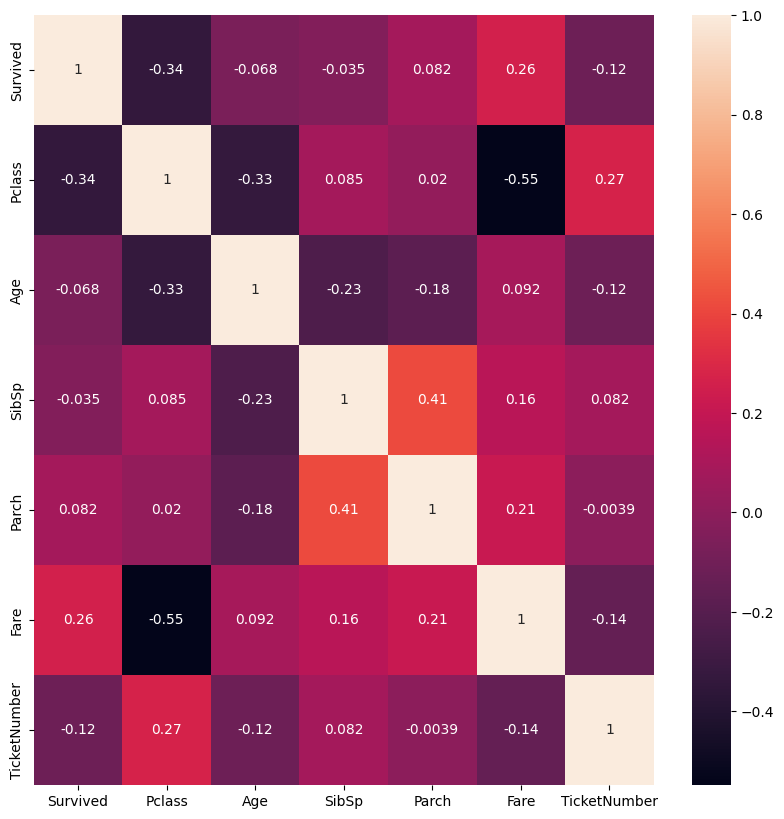

In [ ]:

# Correlation matrix
# corr = train.corr()

# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [ ]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Sex', 'Embarked', 'TicketPrefix'])], remainder='passthrough')
ct = ColumnTransformer(transformers=[
    ('oneHotEncoder', OneHotEncoder(), ['Sex', 'Embarked']),  # One-Hot Encoding for 'Sex' and 'Embarked'
    ('binaryEncoder', BinaryEncoder(cols=['TicketPrefix']), ['TicketPrefix'])  # Binary Encoding for 'TicketPrefix'

], remainder='passthrough')

x = ct.fit_transform(x)
print(x)

[[0.000000e+00 1.000000e+00 0.000000e+00 ... 0.000000e+00 7.250000e+00
  2.117100e+04]
 [1.000000e+00 0.000000e+00 1.000000e+00 ... 0.000000e+00 7.128330e+01
  1.759900e+04]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 7.925000e+00
  3.101282e+06]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 2.000000e+00 2.345000e+01
  6.607000e+03]
 [0.000000e+00 1.000000e+00 1.000000e+00 ... 0.000000e+00 3.000000e+01
  1.113690e+05]
 [0.000000e+00 1.000000e+00 0.000000e+00 ... 0.000000e+00 7.750000e+00
  3.703760e+05]]


In [ ]:
joblib.dump(ct ,'titanic_encoder.pkl')

['titanic_encoder.pkl']

In [ ]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2 ,random_state = 0)


In [ ]:
x_train

array([[1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        7.525000e+01, 1.108130e+05],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        7.920000e+01, 1.758500e+04],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.000000e+00,
        4.690000e+01, 2.144000e+03],
       ...,
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.000000e+00,
        2.790000e+01, 3.470880e+05],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        8.050000e+00, 3.920820e+05],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        2.113375e+02, 2.416000e+04]])

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
joblib.dump(scaler ,'Titanic_scaler.pkl')

['Titanic_scaler.pkl']

In [ ]:
# Define models
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('SVM (linear)', SVC(kernel='linear')),
    ('SVM (rbf)', SVC(kernel='rbf')),
    ('KNN', KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier( random_state=0)),
    ('XGBoost classifier', XGBClassifier()),
    ('RandomForest', RandomForestClassifier(random_state=0)),
]

# Initialize results DataFrame
result = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Accuracy', 'CV Std Dev', 'TP', 'TN', 'FP', 'FN'])

# Train and evaluate models
for name, model in models:
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)

    # Cross-validation accuracy
    accuracies = cross_val_score(estimator=model, X=x_train, y=y_train.ravel(), cv=10)

    # Compute metrics
    ac = accuracy_score(y_test, y_pred)
    ps = precision_score(y_test, y_pred)
    rs = recall_score(y_test, y_pred)
    f1s = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    tp, fp, fn, tn = cm.ravel()



 # Append results to DataFrame using pd.concat()
    modelResult = pd.DataFrame([[name, ac, f1s, ps, rs, accuracies.mean() * 100, accuracies.std() * 100, tp, fp, fn, tn]],
                               columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Accuracy', 'CV Std Dev', 'TP', 'FP', 'FN', 'TN'])
    result = pd.concat([result, modelResult], ignore_index=True)


# Display final results
print(result)

<ipython-input-2486-46a4e19863e6>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, modelResult], ignore_index=True)


                 Model  Accuracy  F1 Score  Precision    Recall  CV Accuracy  \
0  Logistic Regression  0.808989  0.753623   0.742857  0.764706    79.517103   
1         SVM (linear)  0.786517  0.736111   0.697368  0.779412    78.382294   
2            SVM (rbf)  0.792135  0.717557   0.746032  0.691176    81.356137   
3                  KNN  0.786517  0.683333   0.788462  0.602941    79.945674   
4          Naive Bayes  0.438202  0.553571   0.397436  0.911765    45.358149   
5        Decision Tree  0.803371  0.755245   0.720000  0.794118    76.816901   
6   XGBoost classifier  0.831461  0.779412   0.779412  0.779412    82.193159   
7         RandomForest  0.842697  0.797101   0.785714  0.808824    83.185111   

   CV Std Dev  TP  TN  FP  FN  
0    3.117803  92  52  18  16  
1    4.540006  87  53  23  15  
2    3.377540  94  47  16  21  
3    4.298288  99  41  11  27  
4    4.512357  16  62  94   6  
5    4.673883  89  54  21  14  
6    3.592200  95  53  15  15  
7    3.038910  95  55  

In [ ]:
classifier_RFC = RandomForestClassifier()

In [ ]:


parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


In [ ]:
randomized_search = RandomizedSearchCV(estimator=classifier_RFC, param_distributions=parameters, n_iter=5,
                                       n_jobs=-1, scoring='roc_auc', cv=5, verbose=3)

In [ ]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [ ]:
randomized_search.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400)

In [ ]:
randomized_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': True}

In [ ]:
randomized_search.best_score_

0.8698677386895779

In [ ]:
classifier = RandomForestClassifier(
    max_depth=50,
    min_samples_leaf=2,
    min_samples_split=2,
    criterion='gini',
    n_estimators=400,
    max_features = 'log2',
    bootstrap = True
    )
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_leaf=2,
                       n_estimators=400)

In [ ]:
joblib.dump(classifier ,'titanic_model.pkl')

['titanic_model.pkl']

In [ ]:
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cross-validation accuracy
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

tp, fp, fn, tn = cm.ravel()



# Append results to DataFrame using pd.concat()
modelResult = pd.DataFrame([['final Model', acc, f1, prec, rec, accuracies.mean() * 100, accuracies.std() * 100, tp, fp, fn, tn]],
                            columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Accuracy', 'CV Std Dev', 'TP', 'FP', 'FN', 'TN'])
modelResult = pd.concat([result,modelResult],ignore_index=True)
modelResult

,Model,Accuracy,F1 Score,Precision,Recall,CV Accuracy,CV Std Dev,TP,TN,FP,FN
0,Logistic Regression,0.808989,0.753623,0.742857,0.764706,79.517103,3.117803,92,52,18,16
1,SVM (linear),0.786517,0.736111,0.697368,0.779412,78.382294,4.540006,87,53,23,15
2,SVM (rbf),0.792135,0.717557,0.746032,0.691176,81.356137,3.377540,94,47,16,21
3,KNN,0.786517,0.683333,0.788462,0.602941,79.945674,4.298288,99,41,11,27
4,Naive Bayes,0.438202,0.553571,0.397436,0.911765,45.358149,4.512357,16,62,94,6
5,Decision Tree,0.803371,0.755245,0.720000,0.794118,76.816901,4.673883,89,54,21,14
6,XGBoost classifier,0.831461,0.779412,0.779412,0.779412,82.193159,3.592200,95,53,15,15
7,RandomForest,0.842697,0.797101,0.785714,0.808824,83.185111,3.038910,95,55,15,13
8,final Model,0.837079,0.788321,0.782609,0.794118,85.020121,2.349309,95,54,15,14


# Make Prediction with test data

In [ ]:
test = pd.read_csv('/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
target = pd.read_csv('/gender_submission.csv')
target

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test['Embarked'].isnull().any()

False

In [ ]:
test['Age'].isnull().any()


True

In [ ]:
test['Age'].isnull().any()

True

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Need to do PReprocessing for test data

In [ ]:
# Assuming test_data is already loaded

# Drop columns 'Name', 'PassengerId', and 'Cabin'
test.drop(columns=['Name', 'PassengerId','Cabin'], inplace=True)

# Fill missing values in 'Embarked' and 'Age' columns
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(round(train['Age'].mean(), 2), inplace=True)
test['Fare'].fillna(round(train['Fare'].mean(), 2), inplace=True)

# Function to extract the prefix and numeric part from the ticket
def extract_ticket_info(ticket):
    parts = ticket.split()  # Split the ticket by spaces
    if len(parts) > 1:
        return parts[0], parts[1]  # Return prefix and numeric part
    else:
        return 'None', parts[0]    # No prefix, return 'None' and the number

# Apply the function to the 'Ticket' column in test data
test['TicketPrefix'], test['TicketNumber'] = zip(*test['Ticket'].apply(extract_ticket_info))

# Convert the numeric part of the ticket to a numeric value
test['TicketNumber'] = pd.to_numeric(test['TicketNumber'], errors='coerce')

# Drop rows with missing 'TicketNumber' values (if necessary)
test.dropna(subset=['TicketNumber'], inplace=True)

# Drop the original 'Ticket' column
test.drop(columns=['Ticket'], inplace=True)

# Apply the same standardization for the 'TicketPrefix'
def standardize_prefix(prefix):
    """
    Standardize the ticket prefix by:
    - Stripping leading and trailing spaces
    - Converting to uppercase
    - Removing all periods
    """
    if isinstance(prefix, str):
        return prefix.strip().upper().replace('.', '')
    return prefix

test['TicketPrefix'] = test['TicketPrefix'].apply(standardize_prefix)

# Apply the ColumnTransformer to the test data as well
test = ct.transform(test)

test = scaler.transform(test)

print(test)

# Make predictions on the test data using your trained model
predictions = classifier.predict(test)


# Prepare the submission file (use the PassengerId from the original test_data)

submission = pd.DataFrame({
    'PassengerId': target['PassengerId'],
    'Actual Survived': target['Survived'],
    'Predict Survived': predictions
})

# Calculate total accuracy: proportion of correct predictions
total_correct = (submission['Actual Survived'] == submission['Predict Survived']).sum()
total_predictions = len(submission)

# Accuracy in percentage
accuracy = (total_correct / total_predictions) * 100

# Print the accuracy
print(f"Total Accuracy: {accuracy:.2f}%")

print(submission)

submission = pd.DataFrame({
    'PassengerId': target['PassengerId'],
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


[[-7.09355139e-01  7.09355139e-01 -4.78713554e-01 ... -4.69145288e-01
  -4.78094857e-01  1.77655084e-01]
 [ 1.40973110e+00 -1.40973110e+00 -4.78713554e-01 ... -4.69145288e-01
  -4.94375936e-01  2.39608485e-01]
 [-7.09355139e-01  7.09355139e-01 -4.78713554e-01 ... -4.69145288e-01
  -4.41607725e-01  4.13923325e-03]
 ...
 [-7.09355139e-01  7.09355139e-01 -4.78713554e-01 ... -4.69145288e-01
  -4.89467265e-01  5.48134363e+00]
 [-7.09355139e-01  7.09355139e-01 -4.78713554e-01 ... -4.69145288e-01
  -4.73759519e-01  2.32021534e-01]
 [-7.09355139e-01  7.09355139e-01  2.08893187e+00 ...  7.79557208e-01
  -1.92820580e-01 -4.50748551e-01]]
Total Accuracy: 88.52%
     PassengerId  Actual Survived  Predict Survived
0            892                0                 0
1            893                1                 0
2            894                0                 0
3            895                0                 0
4            896                1                 1
..           ...             